### 2. a, b, c, d:

In [24]:
# create your environment
import pandas as pd

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

### 2. e. Read the information from the customers table into a dataframe.

In [25]:
# import your csv

path = './'
customers = pd.read_csv(path + 'telco_2_year_1.csv')

### 2. f.  How many rows are in your dataframe?

In [26]:
customers.shape[0]
# 1695 rows, 4 columns

1695

1695 rows in the customer dataframe.

### 2. g. What is the data type of the field containing the customer ids?

In [27]:
print()
customers.info()
print('Data type of customer_id is string object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1695 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 53.0+ KB
Data type of customer_id is string object


### 2. h. Print to the notebook the last 10 rows of your dataframe.

In [28]:
customers.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.3
1688,9958-MEKUC,72,103.95,7517.7
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.4
1691,9972-EWRJS,67,19.25,1372.9
1692,9975-GPKZU,46,19.75,856.5
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.6


In [29]:
customers[customers.total_charges.str.len() == 1]

,customer_id,tenure,monthly_charges,total_charges
234,1371-DWPAZ,0,56.05,
416,2520-SGTTA,0,20.00,
453,2775-SEFEE,0,61.90,
505,3115-CZMZD,0,20.25,
524,3213-VVOLG,0,25.35,
678,4075-WKNIU,0,73.35,
716,4367-NUYAO,0,25.75,
726,4472-LVYGI,0,52.55,
941,5709-LVOEQ,0,80.85,
1293,7644-OMVMY,0,19.85,


### 2. k. Fill any missing values with 0.

In [30]:
customers['total_charges_fl'] = customers.total_charges.apply(lambda charge: 0.00 if len(charge) == 1 else float(charge))


In [31]:
customers.head()

,customer_id,tenure,monthly_charges,total_charges,total_charges_fl
0,0013-SMEOE,71,109.70,7904.25,7904.25
1,0014-BMAQU,63,84.65,5377.8,5377.80
2,0016-QLJIS,65,90.45,5957.9,5957.90
3,0017-DINOC,54,45.20,2460.55,2460.55
4,0017-IUDMW,72,116.80,8456.75,8456.75


In [32]:
summary = customers.describe()
summary

,tenure,monthly_charges,total_charges_fl
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000


### 2. i. What is the inner quartile range of tenure? monthly charges? total charges?

In [33]:
summary.loc['iqr'] = summary.loc['75%']-summary.loc['25%']
summary

,tenure,monthly_charges,total_charges_fl
count,1695.000000,1695.000000,1695.000000
mean,56.735103,60.770413,3706.934336
std,18.209363,34.678865,2579.517834
min,0.000000,18.400000,0.000000
25%,48.000000,24.025000,1269.675000
50%,64.000000,64.350000,3593.800000
75%,71.000000,90.450000,5988.800000
max,72.000000,118.750000,8672.450000
iqr,23.000000,66.425000,4719.125000


### 2. j. How many missing values are in each variable?

In [34]:
customers.info()
print('\n No missing values: 1695 non-nulls in all columns')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 5 columns):
customer_id         1695 non-null object
tenure              1695 non-null int64
monthly_charges     1695 non-null float64
total_charges       1695 non-null object
total_charges_fl    1695 non-null float64
dtypes: float64(2), int64(1), object(2)
memory usage: 66.3+ KB

 No missing values: 1695 non-nulls in all columns


### 2. l. Show the ditribution of monthly charges through a histogram

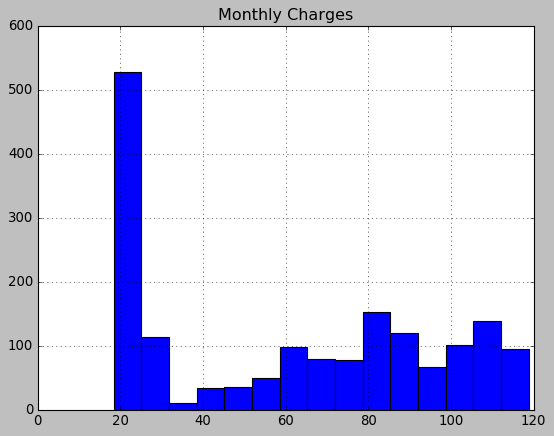

In [59]:
plt.title('Monthly Charges')
customers.monthly_charges.hist(bins=15)
plt.show()

### 2. m.  Create a new dataframe that contains tenure, monthly charges, and total charges, but not the customer id.

In [36]:
df = customers.drop(columns = ['customer_id'])
df
df = df.drop(columns = ['total_charges'])
df.head()

,tenure,monthly_charges,total_charges_fl
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


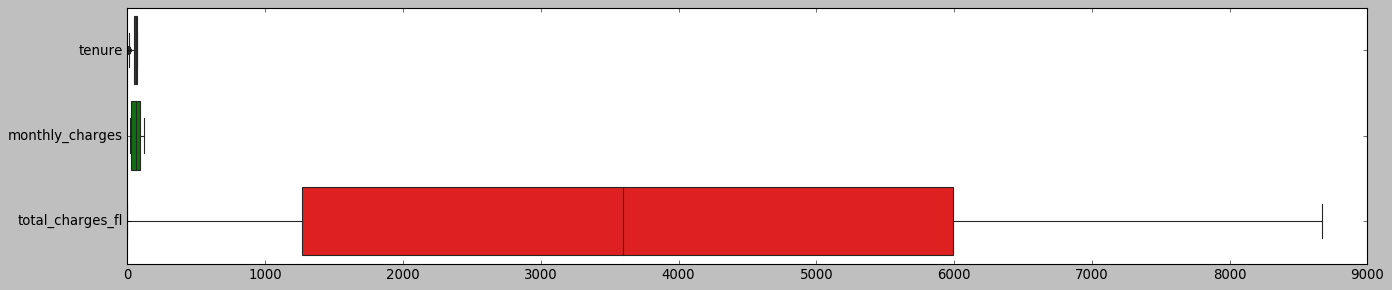

In [37]:
plt.figure(figsize=(20,4))
sns.boxplot(data = df, orient='h')

### 2. o. Split your data into a test and train dataset. Set the random_state to 123. You should end up with 4 dataframes: X_train, X_test, y_train, y_test.

In [38]:
X = df.drop(['total_charges_fl'], axis=1)
y = df[['total_charges_fl']]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, random_state=123)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## #3 Using the in-sample data (X_train and y_train)

### 3. a. Create a scatterplot for each combination of variables.

In [39]:
train = pd.concat([X_train, y_train], axis = 1)
test = pd.concat([X_test, y_test], axis=1)

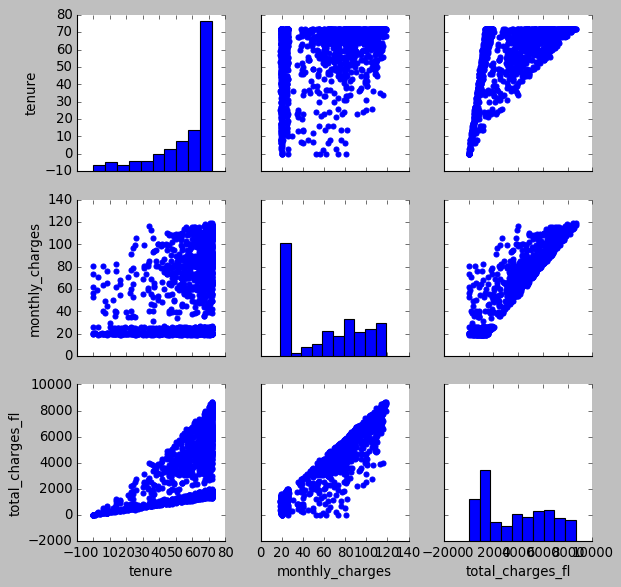

In [40]:
g = sns.PairGrid(train)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

### 3. b. Create a heatmap containing the 3 variables.

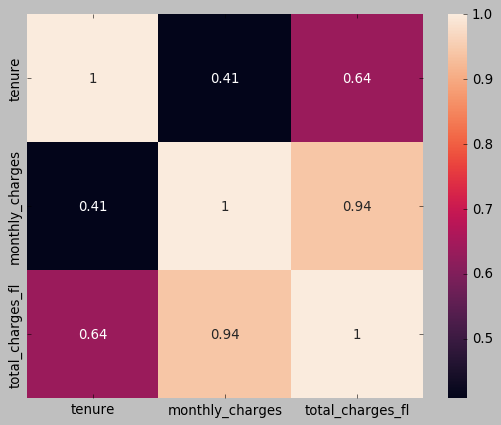

In [41]:
sns.heatmap(train.corr(), annot=True)

### 3. c. Compute pearson's correlation coefficient and print it's value in the sentence "Pearson's R is ____ with a significance p-value of ____"

In [42]:
monthly_pearson = pearsonr(X_train[['monthly_charges']], y_train)
print('Pearson\'s R is {:.4} with a significance p-value of {:.4}'.format(monthly_pearson[0][0],monthly_pearson[1][0]))


Pearson's R is 0.9417 with a significance p-value of 0.0


In [43]:
tenure_pearson = pearsonr(X_train[['tenure']], y_train)
print('Pearson\'s R is {:.4} with a significance p-value of {:.4}'.format(tenure_pearson[0][0],tenure_pearson[1][0]))



Pearson's R is 0.635 with a significance p-value of 5.692e-154


### 3. d. Train (aka fit) a linear regression model, modeling total charges as a linear function of tenure.

In [44]:
lm_ten = LinearRegression(fit_intercept=False)

In [45]:
lm_ten.fit(X_train[['tenure']], y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [46]:
y_int_ten = lm_ten.intercept_

In [47]:
m_ten = lm_ten.coef_

### 3. e. What is the y-intercept of the regression line? Translate the intercept in plain english, i.e. what is means in the context of the data.

### 3. f. What the slope of the regression line? Translate the slope in plain english, i.e. what is means in the context of the data.

### 3. g. Write the linear function in the form of  y = mx+b using the parameters that were estimated from the algorithm and the variable names for y and x specific to your data.

In [48]:
print('y intercept of this model is {} because we set it manually by perception that someone at 0 months tenure would be at $0'.format(y_int_ten))
print('\nslope of this regression is {:.4}, the expected monthly rate per tenure month'.format(m_ten[0][0]))
print('\n our linear function looks like this: \n')
print('y = {:.4}*x + {}'.format(m_ten[0][0], y_int_ten))

y intercept of this model is 0.0 because we set it manually by perception that someone at 0 months tenure would be at $0

slope of this regression is 67.82, the expected monthly rate per tenure month

 our linear function looks like this: 

y = 67.82*x + 0.0


### 3. h. Test your model on the training sample. That is, use your newly fit model to predict the total charges using tenure.

In [49]:
y_pred_ten = lm_ten.predict(X_train.drop(columns=['monthly_charges']))

### 3. i. Evaluate the model's performance using r-squared, mean squared error, and median absolute error.

In [50]:
mse_lm_ten = mean_squared_error(y_train, y_pred_ten)
print('lm_ten mse: {:.12}'.format(mse_lm_ten))
r2_lm_ten = r2_score(y_train, y_pred_ten)
print('{:.4} of the variance in the student\'s final grade can be explained by the tenure of the customer'.format(r2_lm_ten))
med_abs_ten = median_absolute_error(y_train, y_pred_ten)
print('lm_ten median abs error: {:.6}'.format(med_abs_ten))

lm_ten mse: 4213606.4162
0.3746 of the variance in the student's final grade can be explained by the tenure of the customer
lm_ten median abs error: 1731.33


## 4. Using the out-of-sample data (X_test, y_test)

### 4. a. Test your model on the test sample.

In [51]:
y_pred_ten_test = lm_ten.predict(X_test.drop(columns=['monthly_charges']))

### 4. b. Evaluate your model's performance on test sample. How do each of the metrics compare to that of the training sample? How can you explain the reason for the difference?

In [52]:
mse_lm_ten = mean_squared_error(y_test, y_pred_ten_test)
print('lm_ten mse: {:.12}'.format(mse_lm_ten))
r2_lm_ten = r2_score(y_test, y_pred_ten_test)
print('{:.4} of the variance in the student\'s final grade can be explained by the tenure of the customer'.format(r2_lm_ten))
med_abs_ten = median_absolute_error(y_test, y_pred_ten_test)
print('lm_ten median abs error: {:.6}'.format(med_abs_ten))

lm_ten mse: 3881232.74645
0.3834 of the variance in the student's final grade can be explained by the tenure of the customer
lm_ten median abs error: 1586.27


The metrics are very similar on our test data compared to our train data, implying that the results that we gleaned from the train phase were accurate for our full data set.  Differences are inevitable due to the fact that the model was built solely on the training set of data and not on the test, but we see that the model is roughly as reliable (actually somewhat moreso) on the test data.

### 4. c. Calculate the p-value of the regressor for the train and test sample. Hint: f_regression

In [53]:
from sklearn.feature_selection import f_regression
print(f_regression(X_test, y_test.total_charges_fl.ravel(), center=True))
print(f_regression(X_train, y_train.total_charges_fl.ravel(), center=True))

ols_model = sm.OLS(y_train, X_train)
fit = ols_model.fit()
fit.summary()


(array([ 231.6718391 , 2663.48364019]), array([3.48651193e-040, 4.59644491e-162]))
(array([  914.87196992, 10609.98914396]), array([5.69213682e-154, 0.00000000e+000]))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_charges_fl   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                 1.689e+04
Date:                Wed, 20 Mar 2019   Prob (F-statistic):               0.00
Time:                        15:14:20   Log-Likelihood:                -11134.
No. Observations:                1356   AIC:                         2.227e+04
Df Residuals:                    1354   BIC:                         2.228e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
tenure              7.7532      0.885      8.764      0.000       6.018       9.489
monthly_charges    57.4366      0.752     76.399      0.000      55.962      58.911
==============================================================================
Omnibus:                      233.389   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              531.251
Skew:                          -0.961   Prob(JB):                    4.37e-116
Kurtosis:                       5.390   Cond. No.                         4.18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4. d. Create a scatter plot of the predicted values versus the actual values in the test sample.

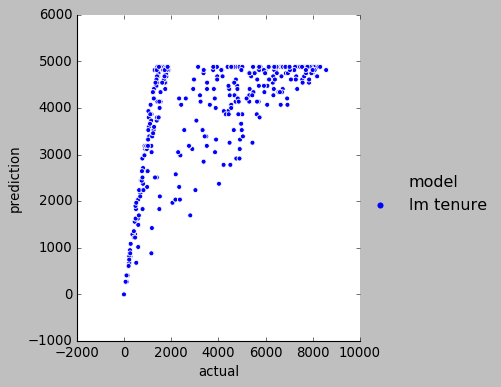

In [54]:
pd.DataFrame({'actual': y_test.total_charges_fl,
              'lm tenure': y_pred_ten_test.ravel(),
              })\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction', hue='model')

### 4. e. Create a scatter plot of the actual values of x and y in the test sample with the regression line layered over.

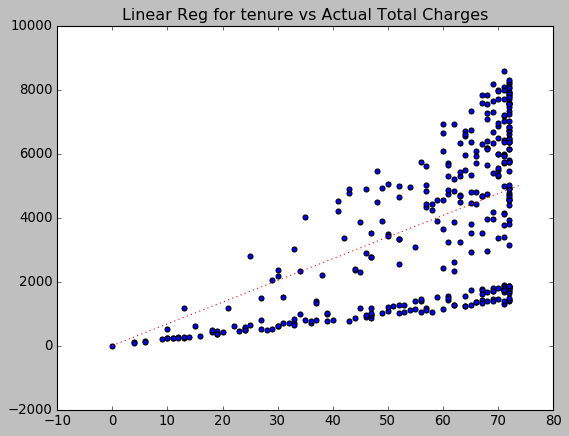

In [55]:
slope = m_ten[0][0]

plt_df = pd.DataFrame({'total_charges': y_test.total_charges_fl,
              'tenure': X_test.tenure,
              })
plt.scatter(plt_df.tenure, plt_df.total_charges)
x = range(0,75)
plt.plot(x, [slope*n for n in x], c = 'red', ls=':')
plt.title('Linear Reg for tenure vs Actual Total Charges')
plt.show()


### 4. f. Create a scatter plot of the residuals (x axis: predicted values of final grade, y axis: the residual values (remember definition of residual from previous lesson). Layer over it a horizonal line that represents no residual.

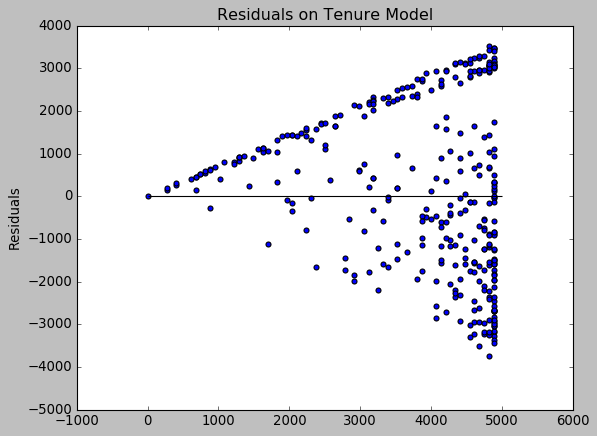

In [56]:
plt.scatter(y_pred_ten_test, y_pred_ten_test - y_test)
plt.hlines(y=0,xmin=0,xmax=5000)
plt.title('Residuals on Tenure Model')
plt.ylabel('Residuals')
plt.show()